**Predicting heart disease using machine learning**

In [1]:
#prepare the tolls

In [9]:
%pip install scikit-learn

  Using cached scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.0/10.6 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/10.6 MB 465.5 kB/s eta 0:00:23
   ---------------------------------------- 0.1/10.6 MB 654.9 kB/s eta 0:00:17
   - -------------------------------------- 0.4/10.6 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.4/10.6 MB 1.8 MB/s eta 0:00:06
   - -------------------------------------- 0.4/10.6 MB 1.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.6/10.6 MB 1.6 MB/s eta 0:00:07
   -- ------------------------------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\HP\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [149]:
#import all the tools

#regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn import metrics

#models from schikel learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay


**Load Data**

In [39]:
df = pd.read_csv("heart-disease (1).csv")
df.shape

(303, 14)

#Data Exploration (EDA)
#The goal here is to find out more about the data and become a subject matter 
expert on the dataset you're working with.
1.What question(s) are you trying to solve?
2.What kind of data do we have and how do we treat different types?
3.What's missing from the data and how do you deal with it?
4.where are the outliers and why should you care about them?
5.How can you add, change or remove features to get more out of your data?



In [40]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [41]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

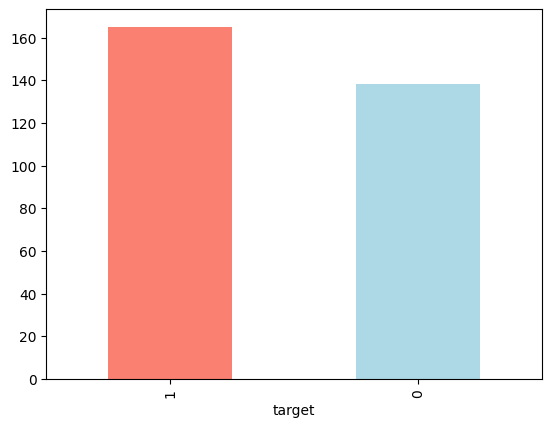

In [42]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [44]:
#is there any null value?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [45]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [46]:
###heart disease frequency according to sex
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [47]:
#compare target col with sex col
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


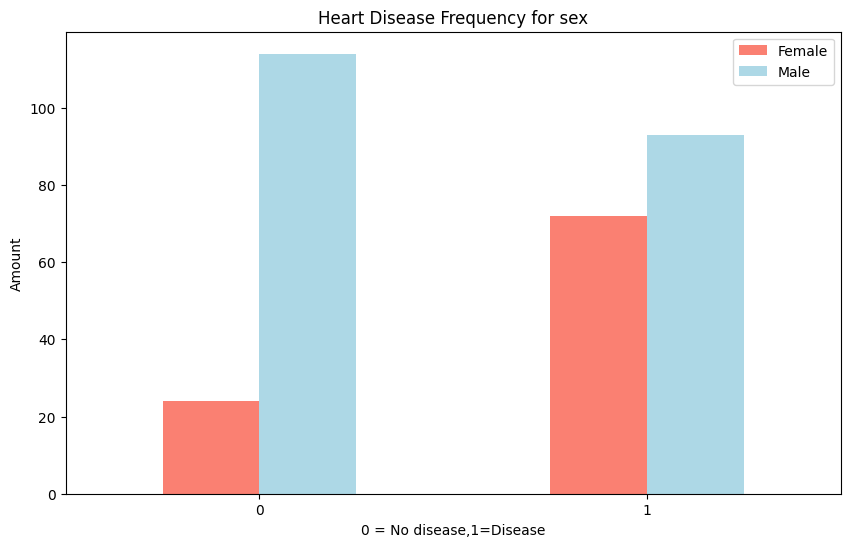

In [37]:
#create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No disease,1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

In [48]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Age vs max Heart rate for heart disease**

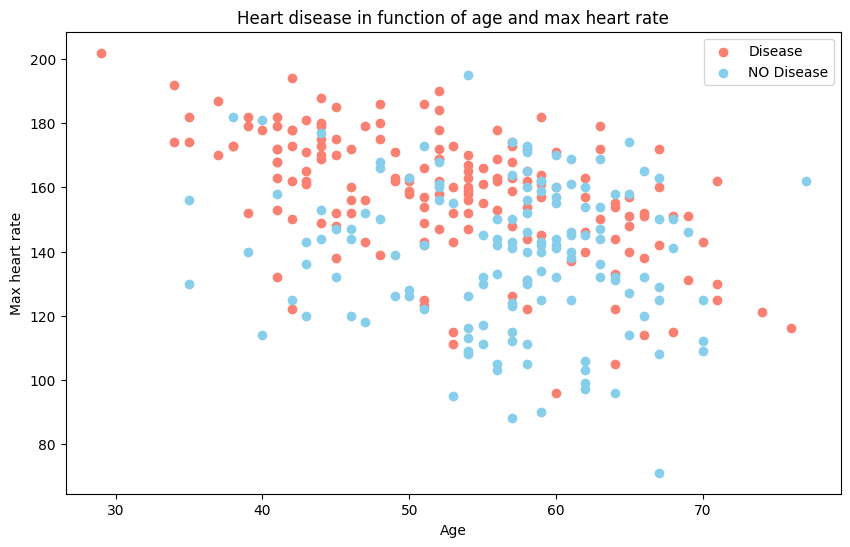

In [57]:
#create another figure
plt.figure(figsize=(10,6))
#scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="salmon")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="skyblue");
plt.xlabel("Age")
plt.ylabel("Max heart rate");
plt.title("Heart disease in function of age and max heart rate")
plt.legend(["Disease","NO Disease"]);

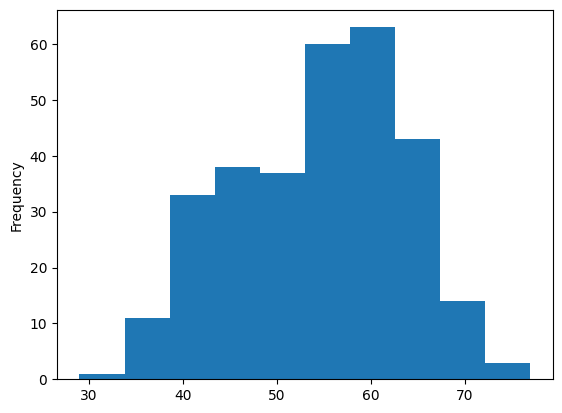

In [59]:
#check the distribution of the age col with a histogram
df.age.plot.hist();

In [60]:
#Heart disease freq 
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


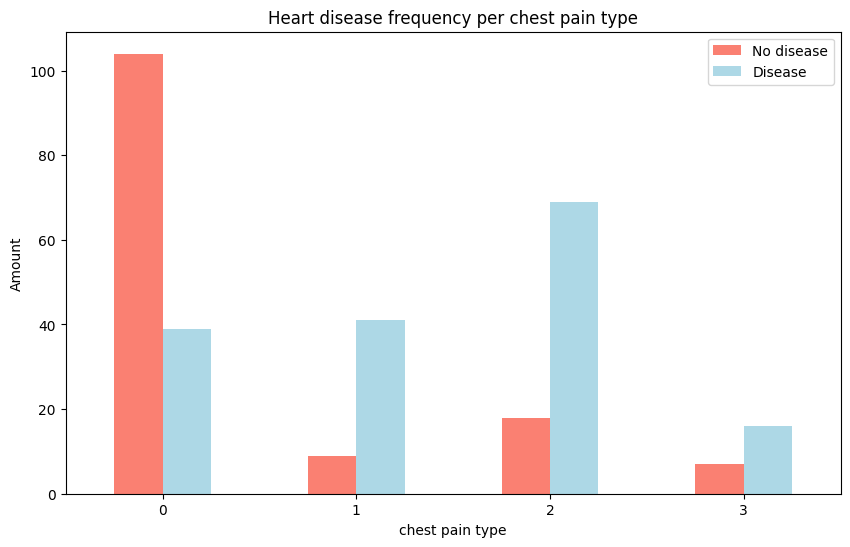

In [65]:
#make the crosstable more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon","lightblue"])
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"])
plt.xticks(rotation=0);

In [66]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


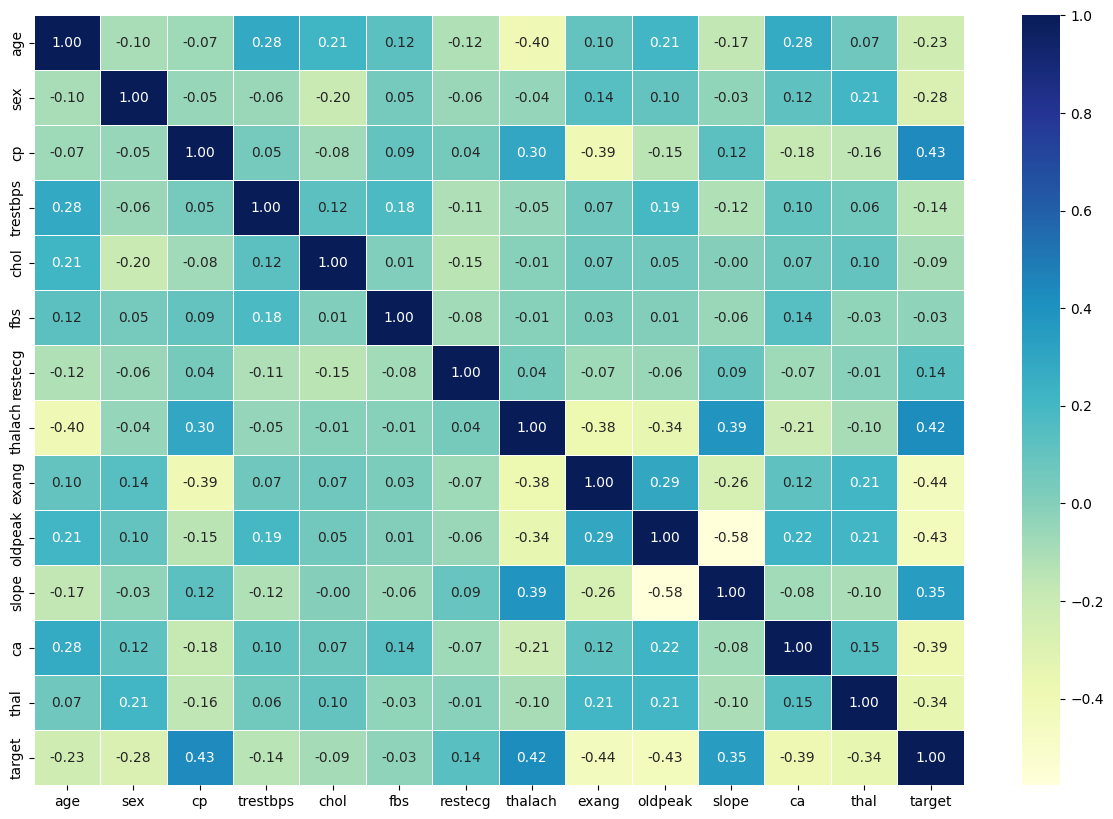

In [68]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");


In [69]:
#split data into x and y
x = df.drop("target",axis=1)
y = df["target"]

In [72]:
#split data into train and test sets
np.random.seed(42)
#split into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

Now we'have got our data into training and test sets 
We will train it (find the patterns) on the training set
We will test it on the test set

We are going to try 3 different machine learning models:
1.Logistic Regression
2.K-Nearest Neighbours Classifier
3.Random Forest Classifier

In [93]:
#make a dictionary of models
models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()
         }
#create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores   
        


In [94]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

**Model comparision**

<Axes: >

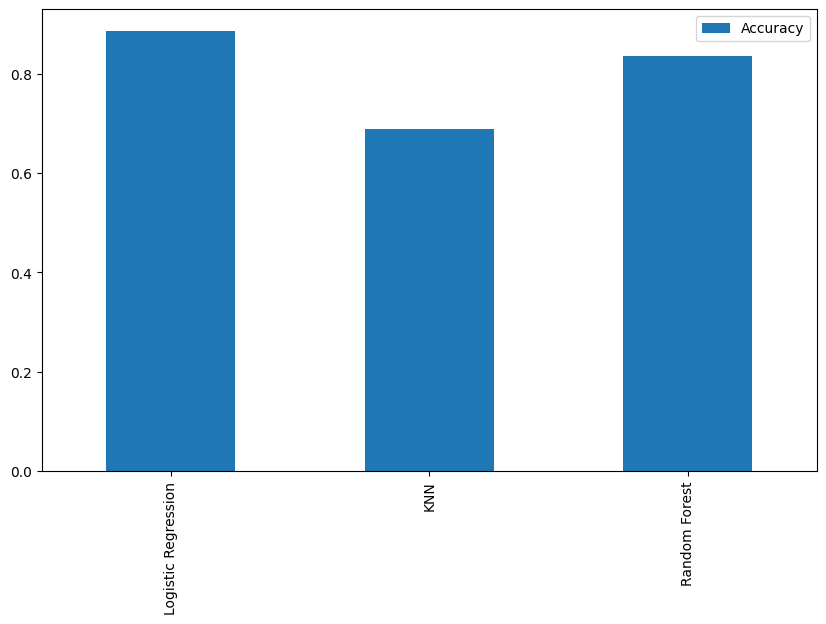

In [100]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.T.plot.bar(figsize=(10,6))

Let's look at the following 
*Hyperparameter tunning 
*Feature importance
*Confusion Metrix
*Cross-validation
*Precision
*Recall
*F1 score
*Classification report
*ROC curve
*Area under the curve(AUC)

In [103]:
#Let's tune KNN
train_scores = []
test_scores = []

#create a list of different values of n_neighbors
neighbors = range(1,21)

#setup KNN instance
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    #Fit the algorithm
    knn.fit(x_train,y_train)
    #update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    #update the test scores list
    test_scores.append(knn.score(x_test,y_test))

In [104]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [105]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data:75.41%


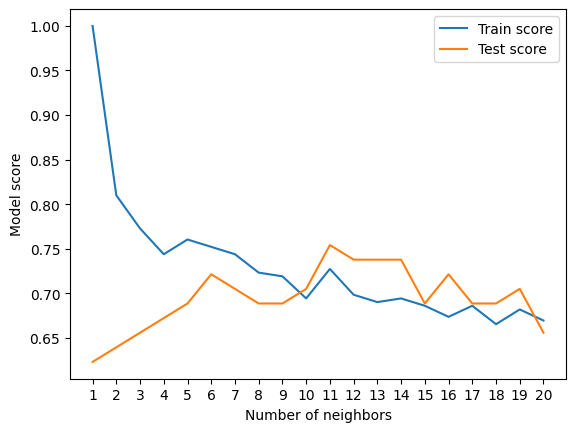

In [116]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

**Hyperparameter tuning with RandomizedSearchCV**

We are going to tune:
*logisticRegression()
*RandomForestClassifier()
...using RandomizedsearchCV

In [132]:
#create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}
#create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

Now we'have got hyperparameter grids setup for each of our models,Let's tune 
them using RandomizedSearchCV...

In [125]:
#Tune LogisticRegression
np.random.seed(42)
#setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [126]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [129]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we've tuned LogisticRegression() let's do the same for RandomForestClassifier

In [133]:
#setup random seed
np.random.seed(42)
#setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
#fit random hyperparametr search model 
rs_rf.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [134]:
#Find the best hyperparaeters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [135]:
#Evaluate the randomized search RandomForestClassifier model
rs_rf.score(x_test,y_test)

0.8688524590163934

1.by hand
2.randomized search cv
3.gridSearchCV

**Hyperparameter tuning with GridsearchCV**

##since our logisticRegression model provides the best scores so far,
we'll try and improve them again using GridSearchCV...

In [138]:
#Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}
#setup grid hyperparameter search for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
#Fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [139]:
#check the best hyperparametr
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [140]:
#Evaluate the grid search logisticRegression model
gs_log_reg.score(x_test,y_test)

0.8852459016393442

#Evaluating our tuned machine laerning classifier,beyond accuracy 
*ROC curve and AUC score
*Confusion matrix
*Classification report
*Precision
*Recall
*F1-score
...and it would be great if cross-validation was used where possible

In [141]:
#make predictions with tuned model
y_preds = gs_log_reg.predict(x_test)

In [142]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

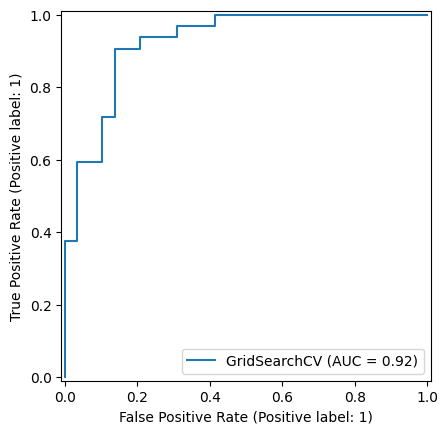

In [159]:
#plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(
   gs_log_reg, x_test, y_test)
plt.show()

In [160]:
#Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


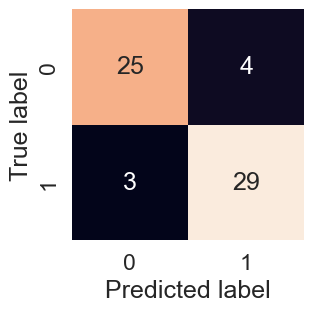

In [162]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
     fig,ax = plt.subplots(figsize=(3,3))
     ax = sns.heatmap(confusion_matrix(y_test,y_preds),
     annot=True,
     cbar=False)
     plt.xlabel("Predicted label")
     plt.ylabel("True label")

plot_conf_mat(y_test,y_preds)

**let's get a classification report as well as cross-validated precision, recall
and f1-score**

In [163]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#calculate evaluation metrics using cross-validation

In [164]:
#check best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [166]:
clf = LogisticRegression(C= 0.20433597178569418,solver="liblinear")

In [168]:
#cross-validated accuracy
cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [170]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [173]:
#cross-validated precision
cv_prec = cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_prec = np.mean(cv_prec)
cv_prec

0.8215873015873015

In [175]:
#cross-validated recall
cv_recall = cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [176]:
#cross-validated f1-score
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

In [181]:
#Features importnace-which features contributed to the outcomes of the model and how did they contribute?

In [182]:
#finding features for logisticRegression

In [185]:
#Find an instance of logisticregression
gs_log_reg .best_params_
clf = LogisticRegression(C=0.20433597178569418,
                        solver="liblinear")
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [186]:
#check coef
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [187]:
#Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

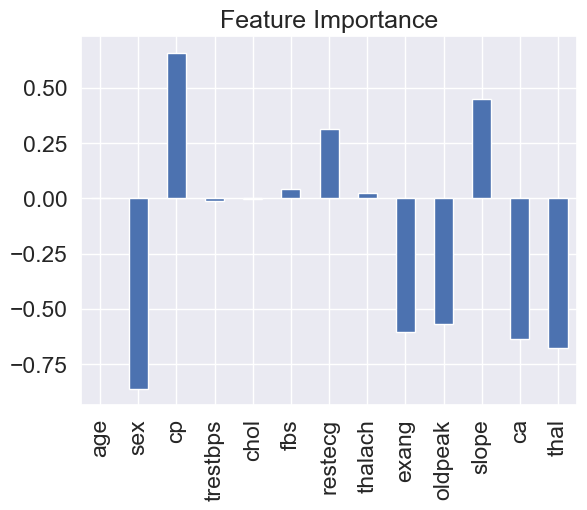

In [191]:
 #visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [192]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [193]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


**Experimentation**

If you haven't hit our evaluation metric yet...ask yourself...
*Could we collect more data?
*Could we try better model?like catboost or XGBoost?
*Could we improve the current models?(beyond what we've done so far)
*If our model is good enough(we have hit our evaluation metric)
how would we export it and share it with others?